<a id='top'></a>

# CSCI 3022: Intro to Data Science - Spring 2019 Practicum 2
***

This practicum is due on Canvas by **11:59 PM on Friday May 3**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
1. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
1. This is meant to be like a coding portion of your midterm exam. So, the instructional team will be much less helpful than we typically are with homework. For example, we will not check answers, help debug your code, and so on.
1. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions though.
2. You may **NOT** post to message boards or other online resources asking for help.
3. You may **NOT** copy-paste solutions *from anywhere*.
4. You may **NOT** collaborate with classmates or anyone else.
5. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on this practicum or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

***

**Name**:  

***


**NOTES**: 

- You may not use late days on the practicums nor can you drop your practicum grades. 
- If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a Practicum clarifications thread. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Bottom](#bot)

---

In [11]:
# import whatever packages you think you will need here!

import numpy as np 
from scipy import stats
import statsmodels.api as sm 
import pandas as pd
import matplotlib.pylab as plt 
%matplotlib inline

<br>

---
<a id='p1'></a>
[Back to top](#top)

### [30 points] Problem 1:  What's the best Oreo flavor?

> <img src="https://media2.s-nbcnews.com/j/newscms/2015_52/1351976/151223-watermelon-oreos-flickr-yh-1234p_a4c4ba1016261e5d799a789666948a6e.fit-760w.jpg" style="width: 400px;"/>
**Figure 1.** Watermelon Oreos. These are undeniably the absolute _worst_ Oreo flavor, but not a part of our data set. If they were, the problem would be too easy.

You're skipping down the road one day, singing a merry tune without a care in the world. Every so often you hop and click your heels together. After one such hop, though, you stumble and nearly trip. Under your feet is a fun data set!

In particular, this rascally data set includes ratings from 5 different individuals for 12 different types of Oreo cookie. Because some of the raters are allergic to disgusting flavors of Oreo, not every taster tasted every type of cookie. More information about the data set can be found [here](https://www.kaggle.com/rtatman/oreo-flavors-tastetest-ratings).

As you examine the data, a booming voice from the sky instructs you to analyze the data to answer two key questions:
1. is there some difference in mean rating given to different flavors of Oreo? and
2. which flavor (out of those in the data set) is the best?

**Part A:** Load the data set as a Pandas DataFrame. Then, process it as you see fit. For the analysis, you might create a new DataFrame, or other kinds of Python objects to use the data. Do what feels right, and include an **explanation** in Markdown of how you are processing the data. You **may not** alter the original data file.

#### 1.A.

I am going to start off by loading in the csv into a dataframe. The colors is the colors I will use to make the scatter plot.

In [12]:
# first off, watermelon oreos are the best flavor no matter what the statistics say
dfOREO = pd.read_csv("oreo_rankings.csv")

# get some purty colors
oreoColors = [
    'coral', # 0
    'gold', # 1
    'forestgreen', # 2 
    'steelblue', # 3
    'orchid', # 4
    'black', # 5
    'crimson' # 6
]

dfOREO

,oreo_flavor,rater_n,rater_c,rater_r,rater_k,rater_a,average_across_raters,notes_and_discussion
0,pb&j,1.5,4.0,2.0,-,-,2.5000,strong but artificial taste; peanut butter bet...
1,mega stuf,2.5,3.0,4.0,-,1.5,2.7500,"too much stuffing to eat easily, cookies separ..."
2,lemon,4.5,3.5,1.5,-,3.5,3.2500,strong artificial lemon flavor
3,chocolate,3.5,3.0,3.5,3,4,3.4000,"weak chocolate flavor, tasted like an American..."
4,birthday cake,2.5,5.0,2.5,4,3,3.4000,"didn't taste like birthday cake, most like rea..."
5,double stuf,3.5,4.0,3.0,3,3.5,3.4000,default Oreos
6,red velvet,4,3.0,4.5,4,2.5,3.6000,realistic red velvet taste with cream cheese f...
7,Dunkin' Donuts Mocha,2.5,1.0,5.0,5,5,3.7000,"tasted like coffee, specifically Dunkin' coffee"
8,mini,3,4.0,4.0,-,4.25,3.8125,taste like Oreos
9,"thins, coconut",3.5,4.5,3.0,4.5,4.5,4.0000,"very light coconut flavor, more like a coconut..."


What I am doing here is to turn the numbers into floats. Through trial and error, I found that the numbers aren't actually read in as floats but as strings. This is an issue. I then copy over into a new data frame. I do this because I do not want to ruin the original and have to constantly run every cell up to that point. I extract the actual rating into an array, and then load that into another array. I thought it was a good idea but turned out to cause more issues. Anyways later on you see me use it again because its just copy and paste. I kept it because I didnt want to rewrite anything.

As always done in the past, I start my normal conventions to make functions that I can conviently call over and over for various tasks.

In [13]:
def clean_oreo_df():
    # make numbers in df floats
    dfOREO["rater_n"] = pd.to_numeric(dfOREO["rater_n"], errors='coerce')
    dfOREO["rater_c"] = pd.to_numeric(dfOREO["rater_c"], errors='coerce')
    dfOREO["rater_r"] = pd.to_numeric(dfOREO["rater_r"], errors='coerce')
    dfOREO["rater_k"] = pd.to_numeric(dfOREO["rater_k"], errors='coerce')
    dfOREO["rater_a"] = pd.to_numeric(dfOREO["rater_a"], errors='coerce')
    dfOREO["average_across_raters"] = pd.to_numeric(dfOREO["average_across_raters"], errors='coerce')

    # copy over to new one that isnt being messed with
    dfOREO0 = dfOREO.copy()

    # get rid of rows where at least one element is missing
    dfOREO0.dropna(inplace=True)
    
    # dfOREO FULL ORIGINAL DF
    return dfOREO0

In [14]:
# make df equal to the clean data.
dfOREO0 = clean_oreo_df()

# print new df
dfOREO0

,oreo_flavor,rater_n,rater_c,rater_r,rater_k,rater_a,average_across_raters,notes_and_discussion
3,chocolate,3.5,3.0,3.5,3.0,4.00,3.40,"weak chocolate flavor, tasted like an American..."
4,birthday cake,2.5,5.0,2.5,4.0,3.00,3.40,"didn't taste like birthday cake, most like rea..."
5,double stuf,3.5,4.0,3.0,3.0,3.50,3.40,default Oreos
6,red velvet,4.0,3.0,4.5,4.0,2.50,3.60,realistic red velvet taste with cream cheese f...
7,Dunkin' Donuts Mocha,2.5,1.0,5.0,5.0,5.00,3.70,"tasted like coffee, specifically Dunkin' coffee"
9,"thins, coconut",3.5,4.5,3.0,4.5,4.50,4.00,"very light coconut flavor, more like a coconut..."
10,mint,3.5,4.0,4.5,4.0,4.25,4.05,"strong mint flavor, creme alone was toothpasty"


Now we have a data frame **without** $\texttt{NaN}$. I wasn't sure where to even start so I decided to why not plot it. Maybe we can see some correlation. I plot all the remaining raters, their rating, and the average rating. The average isnt the true average because some numbers are taken out. I assumed that I would have to run ANOVA later, so I didnt bother updating the average in this data frame. Note: I am writing this in the past and may come back to fix it. Not sure yet if I should but I may need to analyze how the averages change.

I was curious to see how this changed later on. So I added more things.

In [15]:
# Make Scatterplot
def graph_oreo_org():
    # Start with some graphs.. maybe one is glaringly better than the other

    fig, ax = plt.subplots(
        nrows=1,
        ncols=1,
        figsize=(16,9)
    )

    # rn
    ax.scatter(
        dfOREO["oreo_flavor"],
        dfOREO["rater_n"],
        color=oreoColors[0],
        edgecolor=oreoColors[5],
        s=100,
        alpha=0.5
    )

    # rc
    ax.scatter(
        dfOREO["oreo_flavor"],
        dfOREO["rater_c"],
        color=oreoColors[1],
        edgecolor=oreoColors[5],
        s=100,
        alpha=0.5
    )

    # rr
    ax.scatter(
        dfOREO["oreo_flavor"],
        dfOREO["rater_r"],
        color=oreoColors[2],
        edgecolor=oreoColors[5],
        s=100,
        alpha=0.5
    )

    # rk
    ax.scatter(
        dfOREO["oreo_flavor"],
        dfOREO["rater_k"],
        color=oreoColors[3],
        edgecolor=oreoColors[5],
        s=100,
        alpha=0.5
    )

    # rk
    ax.scatter(
        dfOREO["oreo_flavor"],
        dfOREO["rater_a"],
        color=oreoColors[4],
        edgecolor=oreoColors[5],
        s=100,
        alpha=0.5
    )

    plt.plot(
        dfOREO["oreo_flavor"],
        dfOREO["average_across_raters"],
        color=oreoColors[6],
        lw=3
    )

    ax.set_xlabel(
        "Oreo Flavor",
        fontsize=16,
        color=oreoColors[6]
    )

    ax.set_xticklabels(
        dfOREO["oreo_flavor"],
        rotation=45
    )

    ax.set_ylabel(
        "Rating",
        fontsize=16,
        color=oreoColors[6]
    )

    ax.set_title(
        "Scatter Plot of Oreo Flavor Rankings Based on Rater",
        fontsize=24,
        color=oreoColors[6],
    )

    ax.grid(
        alpha=0.1,
        color=oreoColors[5]
    )

    ax.set_axisbelow(
        True
    )

    plt.legend()

    plt.show()

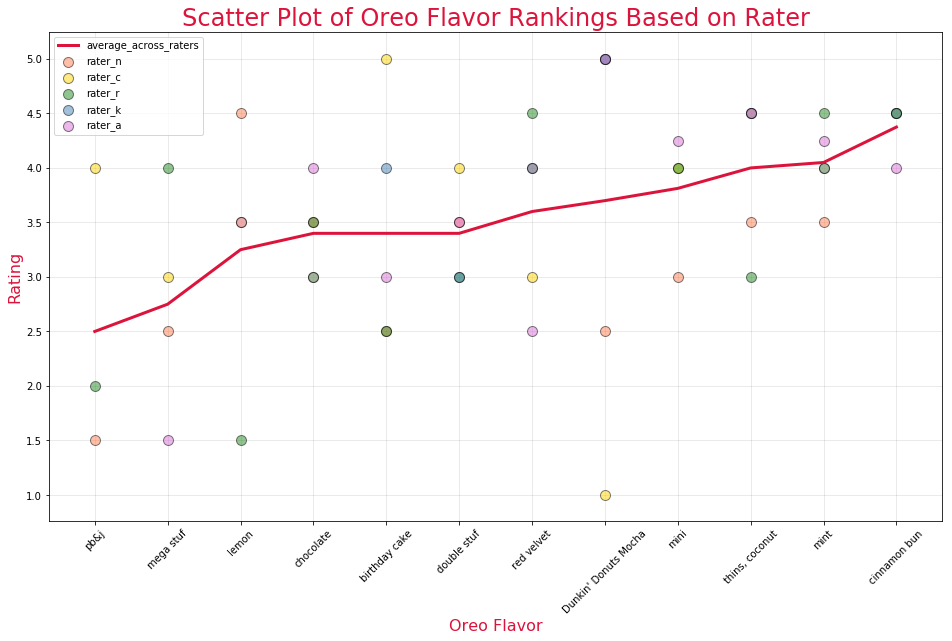

In [16]:
graph_oreo_org()

There doesn't seem to be much correlation in the data.
The data seems very scattered.
There are a few instances where we see patterns.
Some flavors such as mint and cinnamon bun seem to have consistently high scores while others such as pb&j, and mega stuff seem to have low to average ratings.

**Part B:** In the remainder of this problem, you will perform some hypothesis tests to examine whether these data suggest there are significant differences in the mean ratings of the different Oreo flavors. Pick a level of significance for these experiments, and explain how you decided to use that significance level. "Because we used it a lot in class" is ***not*** a good reason.

#### 1.B.

We can use the value $\alpha = 0.05$. This gives us a $95\%$ confidence level that there is a significant difference in the ratings of Oreos. There are two types of errors:
* Type I error: Determining there is a difference in oreos when there isnt
* Type II error: Saying there isnt a difference in Oreos when there is

Since the alpha level is the probability of making a Type I error, and we do not want to make an error, we should make this area as small as possible but still in the realm of making sense.
Suppose we set the alpha level to $0.10$.
There exist a large chance that we may incorrectly reject the null hypothesis by saying there exist a difference in oreo flavors when in reality there there does not exist any difference.
An alpha level of $0.01$ would make the area super small.
Invariably to a large alpha value, the smaller the alpha level, the smaller the area where you would reject the null hypothesis. Saying we reject that there is no difference in Oreo flavors.
With a tiny area, there exist a larger chance that we will not reject the null hypothesis when we should.

**Part C:** Perform an **Analysis of Variance hypothesis test** in order to determine if there is evidence that there is _some_ difference among the mean ratings given to these 12 Oreo flavors. Clearly state your null and alternative hypothesis, and use the significance level identified in **Part B**. You must show **all** calculations **by hand** (and may of course use Python as a calculator, and to compute values from a distribution using the appropriate percent-point-function (ppf) or cumulative distribution function (cdf)).

In addition to showing the code for your calculations, make comments **in Markdown** explaining what you are doing.

#### 1.C.
To start off, I read several documentation on ANOVA and how other software calculates NaN values. Matlab, for example, drops the groups where NaN exists. So I will create a new data frame that calculates the new ANOVA avalues based on any rater that has rated ALL the flavors of Oreo.

In [17]:
# make transposed df
def transpose_oreos(df):
    # copy over to new DF
    dfOREOt = df.copy()

    # drop irrelevant data
    dfOREOt.drop(
        columns=['notes_and_discussion', 'average_across_raters'],
        inplace=True
    )

    # transpose df
    dfOREOt=dfOREOt.transpose()

    #grab the first row for the header
    new_header = dfOREOt.iloc[0]

    #take the data less the header row
    dfOREOt = dfOREOt[1:]

    #set the header row as the df header
    dfOREOt.columns = new_header

    return dfOREOt

In [18]:
dfOREOt = transpose_oreos(dfOREO)
dfOREOt

oreo_flavor,pb&j,mega stuf,lemon,chocolate,birthday cake,double stuf,red velvet,Dunkin' Donuts Mocha,mini,"thins, coconut",mint,cinnamon bun
rater_n,1.5,2.5,4.5,3.5,2.5,3.5,4,2.5,3,3.5,3.5,NaN
rater_c,4,3,3.5,3,5,4,3,1,4,4.5,4,4.5
rater_r,2,4,1.5,3.5,2.5,3,4.5,5,4,3,4.5,4.5
rater_k,NaN,NaN,NaN,3,4,3,4,5,NaN,4.5,4,4.5
rater_a,NaN,1.5,3.5,4,3,3.5,2.5,5,4.25,4.5,4.25,4


Based on this data, we need to figure out if there enough evidence to suggest that there is a difference in oreo flavors.
I will state the null hypothesis as saying that there is no difference in oreo flavors a nd the alternate hypothesis as saying that there is a difference in flavors. We compare the variability between groups to the variability within groups.
$$
H_{0}: \mu_{\text{pb&j}} = \mu_{\text{mega stuf}} = \ldots = \mu_{\text{cinnamon bun}} \\
H_{1}: \mu_{\text{pb&j}} \neq \mu_{\text{mega stuf}} \neq \ldots \neq \mu_{\text{cinnamon bun}} \\
$$
We can say that each oreo flavor is an independent group.

To find the sum of squares within, SSW, and the sum of squares between, SSB, as:
$$
\text{SS(Total)} = \text{SSB} + \text{SSW} \\
\text{SSB} = \sum^{I}_{i=1} n_{i} \left( \bar{y}_{i} - \bar{\bar{y}} \right)^{2} \\
\text{SSW} = \sum^{I}_{i=1} \sum^{n_{i}}_{j=1} \left( y_{i} - \bar{y} \right)^{2} \\
$$
Putting it all together, when using the F-test formula we have:
$$
F = \dfrac{\frac{\text{SSB}}{\text{SSB}_{\text{df}}}}{\frac{\text{SSW}}{\text{SSW}_{\text{df}}}}
    = \dfrac{\frac{\text{SSB}}{I-1}}{\frac{\text{SSW}}{N-I}}
$$

The F statistic follows an F-distribution:
* Rejection region: $F \leq F_{\alpha, p, n-p-1}$
* p-value: $\texttt{1 - stats.f.cdf(F, p, n-p-1)}$

and since we love hypothesis testing, this is written as:
* Rejection region: $F \leq F_{\alpha, I-1, N-1}$
* p-value: $\texttt{1 - stats.f.cdf(F, I-1, N-1)}$ 

In [105]:
def get_Oreo_Fstat():
    # here I take the transposed data frame and seperate the different raters
    # copy over so I dont mess up
    # this needs to be done for ALL flavors. Make a function.
    dfOREOs=dfOREOt.copy()
    # get list of column name
    oreo_flvs=list(dfOREOs.columns.values)
    lencol=len(oreo_flvs)
    print("oreo_flvs: {}; lencol: {}".format(oreo_flvs, lencol)) if(verbose) else None
    
    sums = np.zeros(len(oreo_flvs))
    xbars = np.zeros(len(oreo_flvs))
    cnt = np.zeros(len(oreo_flvs))
    totcnt = 0
    totsum = 0
    
    # iterate through the list of flavors, calculating important values
    for fl in range(len(oreo_flvs)):
        ratings=array_Oreos(dfOREOs, oreo_flvs[fl])
        print("ratings: {}".format(ratings)) if(verbose) else None
        
        lenrat = len(ratings)
        totcnt = totcnt + lenrat
        
        sumrat = sum(ratings)
        totsum = totsum + sumrat
        
        sums[fl] = sumrat
        # print("sums: {}".format(sums)) if(verbose) else None
        
        cnt[fl] = lenrat
        # print("cnt: {}".format(cnt)) if(verbose) else None
        
        xbars[fl] = sums[fl]/cnt[fl]
    
    print("cnt: {}".format(cnt)) if(verbose) else None
    print("sums: {}".format(sums)) if(verbose) else None    
    print("totcnt: {}".format(totcnt)) if(verbose) else None
    print("xbars: {}".format(xbars)) if(verbose) else None
    print("totsum: {}".format(totsum)) if(verbose) else None
    
    SSBdf = lencol - 1
    SSWdf = totcnt - lencol
    print("SSBdf: {}; SSWdf: {}".format(SSBdf, SSWdf)) if(verbose) else None
    
    grandmean = totsum/totcnt
    print("grandmean: {}".format(grandmean)) if(verbose) else None
    
    SSB_array = np.zeros(len(oreo_flvs))
    SSW_array = np.zeros(len(oreo_flvs))
    print("SSB_array: {}".format(SSB_array)) if(verbose) else None
    print("SSW_array: {}".format(SSW_array)) if(verbose) else None
    
    for m in range(len(oreo_flvs)):
        SSB_array[m] = cnt[m]*(xbars[m]-grandmean)**2
        ratings=array_Oreos(dfOREOs, oreo_flvs[m])
        for j in range(len(ratings)):
            SSW_array[m]=SSW_array[m]+(ratings[j]-xbars[m])**2
            print("{} = ({} - {}) ** 2".format(SSW_array[m], ratings[j], xbars[m])) if(verbose) else None
                                                                    
    print("SSB_array: {}".format(SSB_array)) if(verbose) else None
    print("SSW_array: {}".format(SSW_array)) if(verbose) else None
    
    SSB=sum(SSB_array)
    SSW=sum(SSW_array)
    SST = SSB + SSW
    MSB = SSB / SSBdf
    MSW = SSW / SSWdf
    Fstat = MSB / MSW
    print("SSB: {}; SSW: {}; SS(TOTAL): {}".format(SSB, SSW, SST)) if(verbose) else None
    print("MSB: {}; MSW: {}; Fstat: {}".format(MSB, MSW, Fstat)) if(verbose) else None
    
    return Fstat, SSBdf, SSWdf

In [106]:
def array_Oreos(df, dfc):
    pbj=df[dfc]
    pbj=pd.to_numeric(pbj, errors='coerce')
    pbj.dropna(inplace=True)
    pbj=pbj.values
    pbj.ravel()
    return pbj

In [107]:
def calc_f_rej_reg(alpha, SSBdf, SSWdf):
    # calculating
    alpha_f = stats.f.ppf(
        1-alpha,
        SSBdf,
        SSWdf
    )
    return alpha_f

In [108]:
def ANOVA_for_Oreos():
    # sounds like a good band name
    Fstat, SSBdf, SSWdf = get_Oreo_Fstat()
    
    # state alpha value
    alpha = 0.05
    
    # f crit value
    f_crit = calc_f_rej_reg(alpha, SSBdf, SSWdf)
    
    # compute the p val
    pval = 1 - stats.f.cdf(Fstat, SSBdf, SSWdf)
    
    print("alpha: {}, pval: {}, f_crit: {}".format(alpha, pval, f_crit)) if(verbose) else None
    
    if(pval < alpha):
        if(f_crit < Fstat):
            print("Reject the Null Hypothesis")
            print("There is a difference in the oreos")
        else:
            print("F statistic Failure")
            print("We do not reject the null hypothesis")
            print("We can not say there is a difference in the oreos")
    else:
        print("P value Failure")
        print("We do not reject the null hypothesis")
        print("We can not say there is a difference in the oreos")

In [109]:
verbose=True; ANOVA_for_Oreos()    

oreo_flvs: ['pb&j', 'mega stuf', 'lemon', 'chocolate', 'birthday cake', 'double stuf', 'red velvet', "Dunkin' Donuts Mocha", 'mini', 'thins, coconut', 'mint', 'cinnamon bun']; lencol: 12
ratings: [1.5 4.  2. ]
ratings: [2.5 3.  4.  1.5]
ratings: [4.5 3.5 1.5 3.5]
ratings: [3.5 3.  3.5 3.  4. ]
ratings: [2.5 5.  2.5 4.  3. ]
ratings: [3.5 4.  3.  3.  3.5]
ratings: [4.  3.  4.5 4.  2.5]
ratings: [2.5 1.  5.  5.  5. ]
ratings: [3.   4.   4.   4.25]
ratings: [3.5 4.5 3.  4.5 4.5]
ratings: [3.5  4.   4.5  4.   4.25]
ratings: [4.5 4.5 4.5 4. ]
cnt: [3. 4. 4. 5. 5. 5. 5. 5. 4. 5. 5. 4.]
sums: [ 7.5  11.   13.   17.   17.   17.   18.   18.5  15.25 20.   20.25 17.5 ]
totcnt: 54
xbars: [2.5    2.75   3.25   3.4    3.4    3.4    3.6    3.7    3.8125 4.
 4.05   4.375 ]
totsum: 192.0
SSBdf: 11; SSWdf: 42
grandmean: 3.5555555555555554
SSB_array: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SSW_array: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1.0 = (1.5 - 2.5) ** 2
3.25 = (4.0 - 2.5) ** 2
3.5 = (2.0 - 2.5) ** 2

In [33]:
pbj=[1.5, 4.0, 2.0]
ms= [2.5, 3.0, 4.0, 1.5]
lem= [4.5, 3.5, 1.5, 3.5]
choc= [3.5, 3.0, 3.5, 3.0, 4.0]
bday= [2.5, 5.0, 2.5, 4.0, 3.0]
ds= [3.5, 4.0, 3.0, 3.0, 3.5]
rv= [4.0, 3.0, 4.5, 4.0, 2.5]
ddm= [2.5, 1.0, 5.0, 5.0, 5.0]
mini= [3.0, 4.0, 4.0, 4.25]
thins= [3.5, 4.5, 3.0, 4.5, 4.5]
mint= [3.5, 4.0, 4.5, 4.0, 4.25]
cb= [4.5, 4.5, 4.5, 4.0]
stats.f_oneway(pbj, ms, lem, choc, bday, ds, rv, ddm, mini, thins, mint, cb)

F_onewayResult(statistic=1.2082640524252708, pvalue=0.3115130517805584)

Based on the data, we can say that there exist strong enough evidence to say there exist a difference in the oreo flavors. Our F statistic compared to the rejection region (calculated above ) as well as the pvalue compared to the alpha value passes both test. In order to determine with a $95%$ confidence level, we need **both** tests to pass.

* Rejection Region: $2.7173 \lt 7.7547$
* P-value: $4.1484e{-07} \lt 0.05$

**Part D:** Perform a **t hypothesis test** to determine if there is evidence supporting the claim that cinnamon bun Oreos have a higher mean rating than PB&J Oreos. Use the significance level you identified in **Part B**. Clearly state your null and alternative hypotheses, your conclusions, and show all work. Again, you may not use any canned t-test function.

#### 1.D.

First lets establish a null and alternative hypothesis:

$$
H_{0}: \mu_{\text{cb}} = \mu_{\text{pbj}} \\
H_{a}: \mu_{\text{cb}} \gt \mu_{\text{pbj}}
$$

We use the T-test to test out this claim. Out T test statistic comes from the following equation:

$$
\text{T}_{\text{stat}} = \dfrac{\bar{x}_{\text{cb}} - \bar{x}_{\text{pbj}}}{\sqrt{\frac{s_{\text{cb}}^{2}}{n_{cb}}- \frac{s_{\text{pbj}}^{2}}{n_{pbj}}}}
$$

We can run the T test and to get the p value needed to find the rejection region.

**note**: I did this part before part 1.C.

In [244]:
def T_Test_Oreo():
    alpha = 0.05
    # get the peanut butter jelly data
    dfOREOpbj = dfOREO.copy()
    dfOREOpbj = dfOREOpbj[dfOREOpbj['oreo_flavor'] == 'pb&j']
    
    # drop irrelevant data
    dfOREOpbj.drop(
        columns=[
            'oreo_flavor',
            'notes_and_discussion',
            'average_across_raters',
            'rater_k', # has no value
            'rater_a' # has no value
        ],
        inplace=True
    )
    
    # make them floats!!
    dfOREOpbj["rater_n"] = pd.to_numeric(dfOREOpbj["rater_n"], errors='coerce')
    dfOREOpbj["rater_c"] = pd.to_numeric(dfOREOpbj["rater_c"], errors='coerce')
    dfOREOpbj["rater_r"] = pd.to_numeric(dfOREOpbj["rater_r"], errors='coerce')
    
    # peanut butter jelly values
    pbj_vals = dfOREOpbj.values
    pbj_vals = pbj_vals.ravel()
    print("pbj_vals: {}".format(pbj_vals)) if(verbose) else None
    
    
    # peanut butter jelly mean
    mean_pbj = dfOREO.loc[dfOREO['oreo_flavor'] == 'pb&j', 'average_across_raters'].values[0]
    print("mean_pbj: {}".format(mean_pbj)) if(verbose) else None
    
    # get the number of rates for pbj -> 3
    n_pbj = len(pbj_vals)
    print("n_pbj: {}".format(n_pbj)) if(verbose) else None\
    
    # computer
    sqrt_pbj = pbj_vals - mean_pbj
    sqrt_pbj = sqrt_pbj**2
    sqrt_pbj = sqrt_pbj/(n_pbj - 1)
    sqrt_pbj = sum(sqrt_pbj)
    print("sqrt_pbj: {}".format(sqrt_pbj)) if(verbose) else None
    
    #############
    # get the cinnamon data
    dfOREOcin = dfOREO.copy()
    dfOREOcin = dfOREOcin[dfOREOcin['oreo_flavor'] == 'cinnamon bun']
    
    # drop irrelevant data
    dfOREOcin.drop(
        columns=[
            'oreo_flavor',
            'notes_and_discussion',
            'average_across_raters',
            'rater_n' # has no value
        ],
        inplace=True
    )
    
    # conversion
    dfOREOcin["rater_c"] = pd.to_numeric(dfOREOcin["rater_c"], errors='coerce')
    dfOREOcin["rater_r"] = pd.to_numeric(dfOREOcin["rater_r"], errors='coerce')
    dfOREOcin["rater_k"] = pd.to_numeric(dfOREOcin["rater_k"], errors='coerce')
    dfOREOcin["rater_a"] = pd.to_numeric(dfOREOcin["rater_a"], errors='coerce')
    
    # cinnamon values
    cin_vals = dfOREOcin.values
    cin_vals = cin_vals.ravel()
    print("cin_vals: {}".format(cin_vals)) if(verbose) else None
    
    # compute cinnamon mean
    mean_cin = dfOREO.loc[dfOREO['oreo_flavor'] == 'cinnamon bun', 'average_across_raters'].values[0]
    print("mean_cin: {}".format(mean_cin)) if(verbose) else None
    
    # get the number of rates for cin -> 4
    n_cin = len(cin_vals)
    print("n_cin: {}".format(n_cin)) if(verbose) else None
    
    # computer
    sqrt_cin = cin_vals - mean_cin
    sqrt_cin = sqrt_cin**2
    sqrt_cin = sqrt_cin/(n_cin - 1)
    sqrt_cin = sum(sqrt_cin)
    print("sqrt_cin: {}".format(sqrt_cin)) if(verbose) else None
    
    # get the degrees of freedom, -2 cus two datasets
    n_df = n_pbj + n_cin - 2
    print("n_df: {}".format(n_df)) if(verbose) else None
    
    # more calcs
    diff_mean = mean_cin - mean_pbj
    print("diff_mean: {}".format(diff_mean)) if(verbose) else None
    
    stdvs = (sqrt_cin/n_cin + sqrt_pbj/n_pbj)**(1/2)
    print("stdvs: {}".format(stdvs)) if(verbose) else None
    
    Tstat = diff_mean/stdvs
    print("Tstat: {}".format(Tstat)) if(verbose) else None
    
    # p value
    p_val = stats.t.cdf(Tstat, n_df)
    print("p_val: {}".format(p_val)) if(verbose) else None
    
    # t alpha
    T_alpha = stats.t.ppf(alpha, n_df)
    print("t_alpha: {}".format(T_alpha)) if(verbose) else None
    
    if(Tstat < T_alpha):
        if(p < alpha):
            print("Reject the Null Hypothesis")
            print("There is a difference betweem cinnamon bun and pb&j")
        else:
            print("Pvalue test failure")
            print("Do not reject the Null Hypothesis")
            print("There is not a difference betweem cinnamon bun and pb&j")
    else:
        print("T test failure")
        print("Do not reject the Null Hypothesis")
        print("There is not strong enough evidence to say there exist a difference betweem cinnamon bun and pb&j")

In [245]:
verbose=True
T_Test_Oreo()

pbj_vals: [1.5 4.  2. ]
mean_pbj: 2.5
n_pbj: 3
sqrt_pbj: 1.75
cin_vals: [4.5 4.5 4.5 4. ]
mean_cin: 4.375
n_cin: 4
sqrt_cin: 0.0625
n_df: 5
diff_mean: 1.875
stdvs: 0.773923984208613
Tstat: 2.4227185592617446
p_val: 0.9700419268486962
t_alpha: -2.0150483726691575
T test failure
Do not reject the Null Hypothesis
There is not strong enough evidence to say there exist a difference betweem cinnamon bun and pb&j


**Part E:** Do your results from Parts C and D agree with one another? If they agree, explain how they are in agreement in _words_. If they do not agree, explain why you think they do not agree.

_Hint: if they do not agree, consider carefully what assumptions we make in ANOVA and the t-test._

#### 1.E.

The two test do not agree.
The reason being is because the ANOVA test that we used was one-way ANOVA using 12 different flavors.
Of course there would be differences in 12 different flavors. Our variables used also had very different counts.
ANOVA is not comparing one flavor to another or a group, but all the flavors against each other.
This is a very broad test.
There did arise other ways the test could have been improved.
Some flavors were only rated twice while others were rated by all five raters.
I also would argue that one test could influence another test.
If someone has a bad taste from a previous cookie they may be more likely to rate the next one better.
Invariably, if a test subject tasted their favorite cookie, they may not rate the next cookie as high.
For this to be solved, there should have been different raters per each cookie.
Each group does not have a large enough sample size either.
The cookie ratings should have been symmetrically distributed.
The small sample size implied there was non-normality or medaian etc.
To solve this, we should have used bootstrap.

<br>

---
<a id='p2'></a>
[Back to top](#top)

### [30 points] Problem 2: Multiple Linear Regression to Explain House Hauntings

<img src="https://s-media-cache-ak0.pinimg.com/originals/09/72/01/09720128cff5de4d4af038cd3fcf7f69.jpg" style="width: 300px;"/>

In an effort to control the skyrocketing prices of real estate in the Colorado Front Range, Governor Polis implemented a cutting edge new intervention. This new program oversaw the introduction of ghosts back into their natural ecosystem, after the ghost population seriously dwindled in recent decades due to overhaunting. However, an unfortunate miscalculation has led to haunted houses becoming a very serious problem in Colorado. Modern problems require modern solutions, so Governor Polis has hired you and the famous hedgehog data scientist/part-time ghostbuster Amy to determine what features of a house may be used to best predict a `haunted` score, related to the probability that a house with the given features is haunted (higher $\leftrightarrow$ more likely to be haunted).

You decide to use multiple linear regression to understand and predict what factors lead to increased haunted house hazard. You collected a data set from Haunted Zillow, the lesser-known database of haunted house prices and attributes. The data cover a variety of potential features, and you'll find this data in the file `houses.csv`. 

**Response**: 

- $\texttt{haunted}$: a haunting score, related to the probability that a house with the given features is haunted (higher $\leftrightarrow$ more likely to be haunted)

**Features**: 

- $\texttt{age}$: age of the house, in years
- $\texttt{area}$: square footage of interior of house
- $\texttt{bathrooms}$: number of bathrooms
- $\texttt{distance metro}$: distance to the nearest major metropolitan area (in miles)
- $\texttt{distance cemetery}$: distance to the nearest cemetery (in miles)
- $\texttt{cats}$: the number of cats within a one-block radius of the house
- $\texttt{howls}$: the number of wolf howls heard on an average night in the house's neighborhood
- $\texttt{clouds}$: what percentage of the sky was covered by clouds (fraction, 0-1)
- $\texttt{precipitation}$: amount of precipitation in the past 72 hours (inches)
- $\texttt{misery index}$: an economic indicator for how miserable the average United States citizen is, based on the unemployment rate and the inflation rate. More [here](https://www.stuffyoushouldknow.com/podcasts/whats-the-misery-index.htm) and [here](https://en.wikipedia.org/wiki/Misery_index_(economics)). Higher values correspond to more miserable citizens.
- $\texttt{ice cream sold}$: the number of units of ice cream sold at the farmer's market the week the house was most recently sold

**Part A**: Read the data from `houses.csv` into a Pandas DataFrame.  Note that since we will be doing a multiple linear regression we will need all of the features, so you should drop any row in the DataFrame that is missing data. 

In [4]:
dfHOUSES = pd.read_csv("houses.csv")

dfHOUSES.head()

,age,area,bathrooms,distance metro,distance cemetery,cats,howls,clouds,precipitation,misery index,ice cream sold,haunted
0,65.06,2041,1.0,7.1,10.01,7,3,1.00,0.82,12.99,273,-0.596150
1,141.48,1564,0.0,7.4,4.07,5,5,1.00,0.99,16.77,184,-0.146465
2,7.58,1637,3.0,7.0,3.36,2,0,1.00,1.17,16.49,141,-0.303117
3,51.47,2021,2.0,7.9,3.43,6,8,0.13,0.92,8.28,146,0.339912
4,259.44,1642,1.0,7.5,3.19,4,1,1.00,1.73,5.90,178,0.724867


**Part B**: Perform the appropriate statistical test at the $\alpha = 0.01$ significance level to determine if _at least one_ of the features is related to the the response $y$.  Clearly describe your methodology and show all computations in Python. 

**Part C**: Write a function `forward_select(df, resp_str, maxk)` that takes in the DataFrame, the name of the column corresponding to the response, and the maximum number of desired features, and returns a list of feature names corresponding to the `maxk` most important features via forward selection.  At each stage in forward selection you should add the feature whose inclusion in the model would result in the lowest sum of squared errors $(SSE)$. Use your function to determine the best $k=5$ features to include in the model. Clearly indicate which feature was added in each stage. 

**Note**: The point of this exercise is to see if you can implement **foward_select** yourself.  You may of course use canned routines like statmodels OLS, but you may not call any Python method that explicitly performs forward selection.

**Part D**: Write down the multiple linear regression model, including estimated parameters, obtained by your forward selection process. 

**Part E**: Perform the appropriate statistical test at the $\alpha = 0.05$ significance level to determine whether there is a statistically significant difference between the full model with all features and the reduced model obtained by forward selection in **Part D**. 

**Part F**: Based on your conclusions in **Part E**, use the _better_ of the two models to predict the sharknado hazard when the following features are observed: 

- $\texttt{age}$: 100 years
- $\texttt{area}$: 2200 square feet
- $\texttt{bathrooms}$: 3 bathrooms
- $\texttt{distance metro}$: 25 miles
- $\texttt{distance cemetery}$: 10 miles
- $\texttt{cats}$: 4 cats
- $\texttt{howls}$: 5 wolf howls/night
- $\texttt{clouds}$: 0.65 cloud cover
- $\texttt{precipitation}$: 0 inches
- $\texttt{misery index}$: 10
- $\texttt{ice cream sold}$: 125

**Part G:** Governor Polis dabbles a bit in the art of data science, as well as the science of data art. He tells you that the response (`haunted` score) that you and Amy predicted is actually the natural logarithm of the _odds_ that a house with the given features is haunted, where if $p$ is the probability that a house is haunted, then the odds are given by $$\text{odds} = \dfrac{p}{1-p}$$

What transformation must you make in order to turn your multiple regression model into a logistic regression model, to classify a house a haunted or not? Perform this simple transformation, then use a decision threshold of 0.5 to classify the house from **Part F** as haunted or not haunted. No new models should be fit here; use the same model that you used in Part F.

<br>

---
[Back to top](#top)
<a id='bot'></a>